In [1]:
import pandas as pd
data=pd.read_csv('winequality-red.csv')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [4]:
summary_stats = data.describe()
print("\nSummary Statistics:\n", summary_stats)


Summary Statistics:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000        

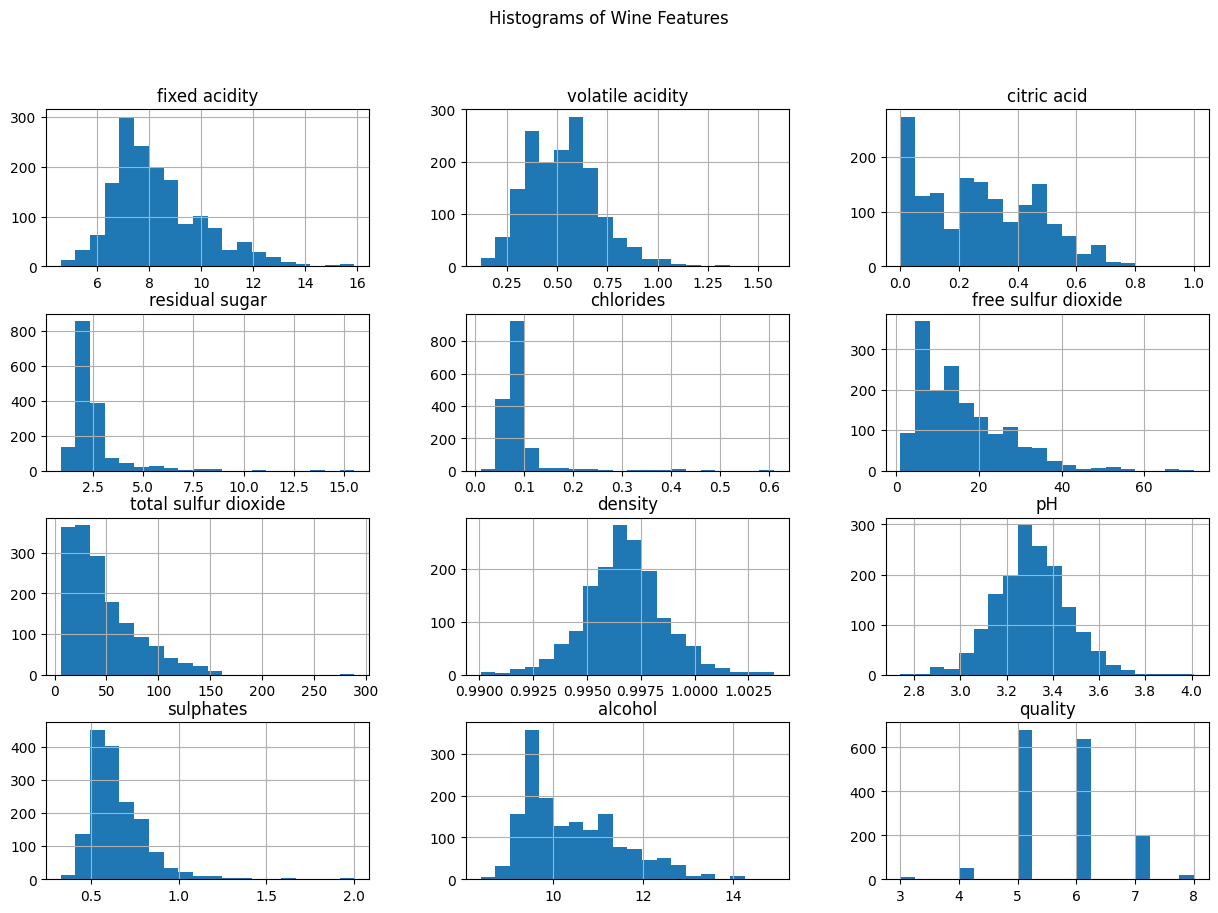

In [5]:
data.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Wine Features")
plt.show()

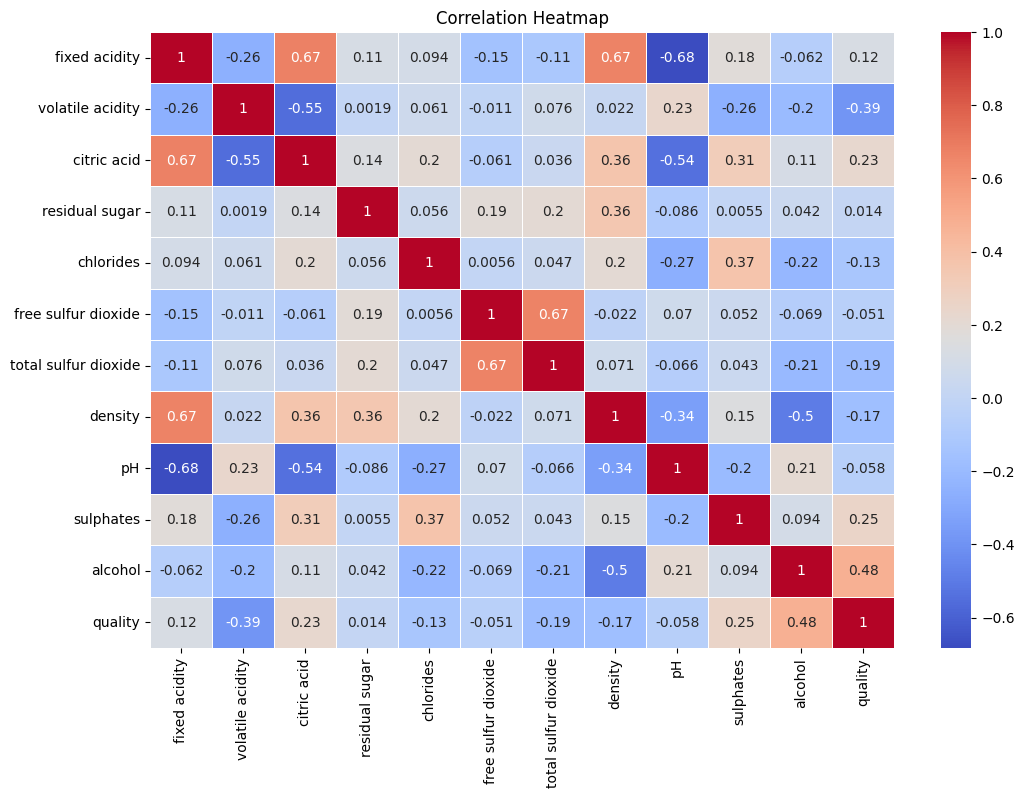

In [6]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [34]:
bins = (2,6.5,8)
group_names = ['good', 'bad']
categories = pd.cut(data['quality'], bins, labels = group_names)
data['quality'] = categories

data['quality'].value_counts()

good    1382
bad      217
Name: quality, dtype: int64

In [37]:
y=data['quality']

In [35]:
X_new = data.drop('quality', axis=1)
y_new = data['quality']
y_new.head()

0    good
1    good
2    good
3    good
4    good
Name: quality, dtype: category
Categories (2, object): ['good' < 'bad']

In [38]:
le = LabelEncoder()
y = le.fit_transform(y)
y[0:5]

array([1, 1, 1, 1, 1])

In [39]:
le = LabelEncoder()
y = le.fit_transform(y)
y[0:5]

array([1, 1, 1, 1, 1])

In [43]:
y_new = le.fit_transform(y_new)
y_new[0:5]

array([1, 1, 1, 1, 1])

In [44]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new,y_new, test_size = 0.2, random_state = 36)

In [45]:
sc = StandardScaler()
X_train_new = sc.fit_transform(X_train_new)
X_test_new = sc.transform(X_test_new)

In [46]:
parameters_new = {'C':[0.1,1,10], 'gamma':[0.1, 1, 10], 'kernel':['linear','rbf'], 'degree' : [0, 1]}

clf_new = GridSearchCV(estimator=SVC(), param_grid=parameters_new, n_jobs=-1, cv=8)
clf_new.fit(X_train_new, y_train_new)
print(f"Best accuracy:{clf_new.best_score_} with parameters: {clf_new.best_params_}")

Best accuracy:0.9116647012578617 with parameters: {'C': 10, 'degree': 0, 'gamma': 1, 'kernel': 'rbf'}


In [47]:
random_observation = pd.DataFrame({
    'Fixed Acidity': [7.0],
    'Volatile Acidity': [0.4],
    'Citric Acid': [0.2],
    'Residual Sugar': [2.0],
    'Chlorides': [0.08],
    'Free Sulfur Dioxide': [15.0],
    'Total Sulfur Dioxide': [50.0],
    'Density': [0.995],
    'pH': [3.3],
    'Sulphates': [0.6],
    'Alcohol': [11.0]
})
random_prediction = clf_new.predict(random_observation)
print(f'Predicted Wine Quality: {random_prediction[0]}')

Predicted Wine Quality: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
